# Pluggable mantisshrimp (DETR showcase)

Check out this tutorial in [colab](https://colab.research.google.com/github/lgvaz/mantisshrimp/blob/master/tutorials/hub_detr_finetune_pennfundan.ipynb) with no setup required!


Normaly we use mantisshrimp as an end to end library, but it's also possible to use only a specific part of it, in this case the Parser API.  

In this tutorial, we are going to train a model using the original [DETR source code](https://github.com/facebookresearch/detr) with the flexibility of mantisshrimp Parser API!

We will be working with the Penn-Fundan dataset. The same dataset used for the pytorch [maskrcnn tutorial](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html).

## Dependencies

Run the following commands for installing the dependencies if running on Google Colab(remove the `!` if running on terminal).

In [ ]:
!pip install git+git://github.com/lgvaz/mantisshrimp.git
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install seaborn

## Imports

In [ ]:
from mantisshrimp.imports import *
from mantisshrimp import *

## The Data

In Mantisshrimp hub we have a helper function that will automatically download and extract the data for us. (This will be moved to `datasets`)

In [ ]:
from mantisshrimp.hub.pennfundan import *

In [ ]:
source = get_pennfundan_data()

## Parser

Also in hub, we already have a pre-defined parser for this dataset, if you want to learn more on how to create a custom parser, check the [Parser tutorial](https://lgvaz.github.io/mantisshrimp/tutorials/parser.html). (Will also be moved from `hub` to `datasets`)

In [ ]:
parser = PennFundanParser(source)

Now we use our `Parser` to, well, parse our data!  

Define what kind of train/validation split we want, in this case, let's make a random split with 80% of the data in the training set and 20% on the validation.

In [ ]:
data_splitter = RandomSplitter([0.8, 0.2])

And now we are ready to parse!

In [ ]:
train_rs, valid_rs = parser.parse(data_splitter)

## Transforms

Everything that is required to train `Detr` is inside the `hub.detr` module, so let's import that.

In [ ]:
from mantisshrimp.hub.detr import *

Mantisshrimp is agnostic to transforms, so we will use the exact same transforms that the authors of Detr used (it's even from their code!).

In [ ]:
train_tfm = detr_transform("train")
valid_tfm = detr_transform("val")

We create our `Dataset` as always, passing the records and the transforms.  

The only difference is that this time we're using the specialized `DetrDataset`.

In [ ]:
train_dataset = DetrDataset(train_rs, train_tfm)
valid_dataset = DetrDataset(valid_rs, valid_tfm)

## Train

Now, just a little trick for using the original script (that uses argparse, meant for command line usage).

We'll parse the arguments passing an empty string, and then assign the values we want to modify one by one.

In [ ]:
args_parser = detr_args_parser()
args = args_parser.parse_args("")

In [ ]:
args.num_classes = 2
args.epochs = 2
args.batch_size = 4
args.train_only_head = True

<div class="alert alert-info">
    
**Note:**  

Make sure `output_dir` exists, else we have errors.
    
</div>

In [ ]:
output_dir = Path('logs/run1')
output_dir.mkdir(exist_ok=True, parents=True)
args.output_dir = str(output_dir)

<div class="alert alert-warning">
    
**Important:**  
    
For fine-tuning, we resume from a previous checkpoint where the weights of the class head have been deleted.
    
</div>

In [ ]:
args.resume = detr_pretrained_checkpoint_base()

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/checkpoints/detr-r50-e632da11.pth


The final step is to call `run_detr` with the parsed args and the datasets.  

`run_detr` is just an alias that points to the original `main.py` script.

In [ ]:
run_detr(args, train_dataset, valid_dataset)

Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=4, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path=None, dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=2, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=2, num_queries=100, num_workers=2, output_dir='logs/run1', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/root/.cache/torch/detr-r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, train_only_head=True, weight_decay=0.0001, world_size=1)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth



number of params: 41279495



creating index...
index created!
Start training
Epoch: [0]  [ 0/34]  eta: 0:00:33  lr: 0.000100  class_error: 0.00  loss: 9.8023 (9.8023)  loss_ce: 1.3289 (1.3289)  loss_bbox: 0.1444 (0.1444)  loss_giou: 0.1564 (0.1564)  loss_ce_0: 1.2595 (1.2595)  loss_bbox_0: 0.1479 (0.1479)  loss_giou_0: 0.1503 (0.1503)  loss_ce_1: 1.3334 (1.3334)  loss_bbox_1: 0.1569 (0.1569)  loss_giou_1: 0.1687 (0.1687)  loss_ce_2: 1.3434 (1.3434)  loss_bbox_2: 0.1602 (0.1602)  loss_giou_2: 0.1605 (0.1605)  loss_ce_3: 1.3434 (1.3434)  loss_bbox_3: 0.1400 (0.1400)  loss_giou_3: 0.1518 (0.1518)  loss_ce_4: 1.3576 (1.3576)  loss_bbox_4: 0.1439 (0.1439)  loss_giou_4: 0.1549 (0.1549)  loss_ce_unscaled: 1.3289 (1.3289)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0289 (0.0289)  loss_giou_unscaled: 0.0782 (0.0782)  cardinality_error_unscaled: 93.0000 (93.0000)  loss_ce_0_unscaled: 1.2595 (1.2595)  loss_bbox_0_unscaled: 0.0296 (0.0296)  loss_giou_0_unscaled: 0.0751 (0.0751)  cardinality_error_0_unscaled

## Plot logs

plot_utils.py::plot_logs info: logs param expects a list argument, converted to list[Path].


/usr/local/lib/python3.6/dist-packages/mantisshrimp/hub/detr/detr/util/plot_utils.py:55: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  coco_eval = pd.DataFrame(pd.np.stack(col.dropna().values)[:, 1]).ewm(com=ewm_col).mean()


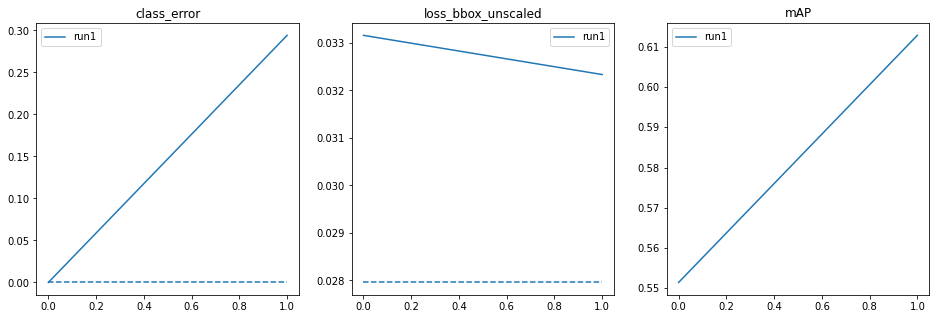

In [ ]:
detr_plot_utils.plot_logs(output_dir)